In [6]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the path to your data folder
data_dir = "C:/Users/Semi/Desktop/projects done/Sign language detection/data/"

def load_data(data_dir):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)
    num_classes = len(class_folders)

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_folder)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Resize images to a common size
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(i)  # Assigning label based on folder index

    images = np.array(images)
    labels = to_categorical(np.array(labels), num_classes)  # Convert labels to categorical format
    return images, labels, num_classes, class_folders

# Load and preprocess the data
images, labels, num_classes, class_folders = load_data(data_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))



C:\Users\Semi\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 136s 647ms/step - accuracy: 0.7717 - loss: 1.0200 - val_accuracy: 0.9938 - val_loss: 0.0188
Epoch 2/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 115s 569ms/step - accuracy: 0.9930 - loss: 0.0253 - val_accuracy: 0.9950 - val_loss: 0.0133
Epoch 3/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 136s 541ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9913 - val_loss: 0.0396
Epoch 4/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 108s 536ms/step - accuracy: 0.9935 - loss: 0.0273 - val_accuracy: 0.9938 - val_loss: 0.0320
Epoch 5/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 110s 548ms/step - accuracy: 0.9958 - loss: 0.0260 - val_accuracy: 0.9950 - val_loss: 0.0140
Epoch 6/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 113s 562ms/step - accuracy: 0.9991 - loss: 0.0096 - val_accuracy: 0.9938 - val_loss: 0.0175
Epoch 7/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 111s 552ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9950 - val_loss: 0.0216
Epoch 8/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 111s 553ms/step - accuracy: 0.9987 -

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.9974 - loss: 0.0108
Test Loss: 0.0245, Test Accuracy: 0.9950


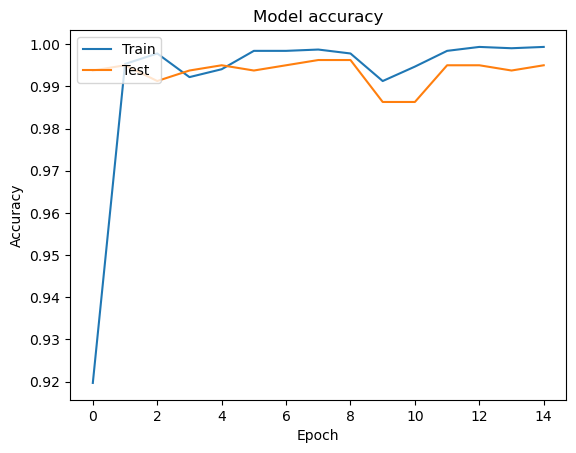

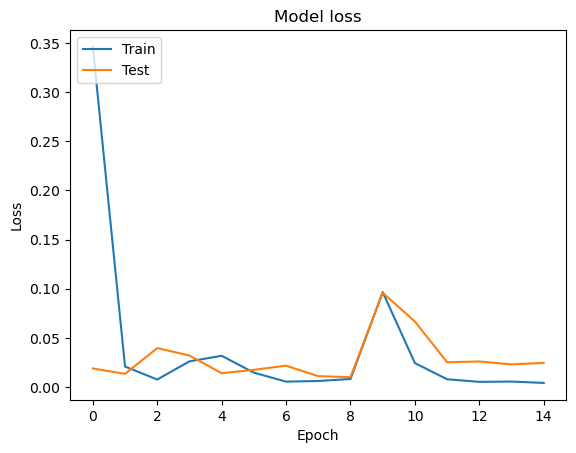

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.9974 - loss: 0.0108
Test Loss: 0.0245, Test Accuracy: 0.9950


In [8]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


In [4]:
# Save the trained model
model.save('cnn_model_keras3.h5')

In [5]:
#data_dir = "C:/Users/Semi/Downloads/Sign language detection/data/"
#images, labels, num_classes, class_folders = load_data(data_dir)

print("Class Folders:", class_folders)

Class Folders: ['Hello', 'Help', 'I love you', 'No', 'OK', 'Please', 'Sorry', 'Thank you', 'Yes']
